In [1]:
#Import necessary libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score

In [2]:
#load dataset
customer=pd.read_csv(r'C:\Users\bivin\OneDrive\Desktop\Zeotap\Customers.csv')
product=pd.read_csv(r'C:\Users\bivin\OneDrive\Desktop\Zeotap\Products.csv')
transaction=pd.read_csv(r'C:\Users\bivin\OneDrive\Desktop\Zeotap\Transactions.csv')

In [3]:
# Merge datasets for analysis
data = transaction.merge(product, on="ProductID", how="left")
data = data.merge(customer, on="CustomerID", how="left")
data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,SoundWave Smartwatch,Electronics,459.86,Jacob Holt,South America,2022-01-22
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,SoundWave Smartwatch,Electronics,459.86,Mrs. Kimberly Wright,North America,2024-04-07
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,SoundWave Smartwatch,Electronics,459.86,Tyler Haynes,North America,2024-09-21
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,SoundWave Smartwatch,Electronics,459.86,Joshua Hamilton,Asia,2024-11-11


In [4]:
customer_features = data.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    total_transactions=('TransactionID', 'nunique'),
    total_products=('ProductID', 'nunique'),
    avg_transaction=('TotalValue', 'mean')
).reset_index()

customer_features.head(5)

,CustomerID,total_spent,total_transactions,total_products,avg_transaction
0,C0001,3354.52,5,5,670.904
1,C0002,1862.74,4,4,465.685
2,C0003,2725.38,4,4,681.345
3,C0004,5354.88,8,8,669.360
4,C0005,2034.24,3,3,678.080


In [5]:
customer_profile = customer[['CustomerID', 'Region', 'SignupDate']]
customer_profile['SignupDate'] = pd.to_datetime(customer_profile['SignupDate'])
customer_profile['signupDays'] = (pd.to_datetime('today') - customer_profile['SignupDate']).dt.days
customer_data = pd.merge(customer_features, customer_profile, on='CustomerID', how='left')
customer_data

,CustomerID,total_spent,total_transactions,total_products,avg_transaction,Region,SignupDate,signupDays
0,C0001,3354.52,5,5,670.904000,South America,2022-07-10,935
1,C0002,1862.74,4,4,465.685000,Asia,2022-02-13,1082
2,C0003,2725.38,4,4,681.345000,South America,2024-03-07,329
3,C0004,5354.88,8,8,669.360000,South America,2022-10-09,844
4,C0005,2034.24,3,3,678.080000,Asia,2022-08-15,899
...,...,...,...,...,...,...,...,...
194,C0196,4982.88,4,3,1245.720000,Europe,2022-06-07,968
195,C0197,1928.65,3,3,642.883333,Europe,2023-03-21,681
196,C0198,931.83,2,2,465.915000,Europe,2022-02-27,1068
197,C0199,1979.28,4,4,494.820000,Europe,2022-12-03,789


In [6]:
# Standardize data
sc = StandardScaler()
numeric_features = ['total_spent', 'total_transactions', 'total_products', 'avg_transaction', 'signupDays']
customer_data[numeric_features] = sc.fit_transform(customer_data[numeric_features])
customer_data

,CustomerID,total_spent,total_transactions,total_products,avg_transaction,Region,SignupDate,signupDays
0,C0001,-0.061701,-0.011458,0.050047,-0.070263,South America,2022-07-10,1.148752
1,C0002,-0.877744,-0.467494,-0.424204,-0.934933,Asia,2022-02-13,1.600431
2,C0003,-0.405857,-0.467494,-0.424204,-0.026271,South America,2024-03-07,-0.713270
3,C0004,1.032547,1.356650,1.472798,-0.076769,South America,2022-10-09,0.869141
4,C0005,-0.783929,-0.923530,-0.898455,-0.040028,Asia,2022-08-15,1.038137
...,...,...,...,...,...,...,...,...
194,C0196,0.829053,-0.467494,-0.898455,2.351666,Europe,2022-06-07,1.250149
195,C0197,-0.841689,-0.923530,-0.898455,-0.188326,Europe,2023-03-21,0.368300
196,C0198,-1.386975,-1.379566,-1.372705,-0.933964,Europe,2022-02-27,1.557414
197,C0199,-0.813993,-0.467494,-0.424204,-0.812176,Europe,2022-12-03,0.700146


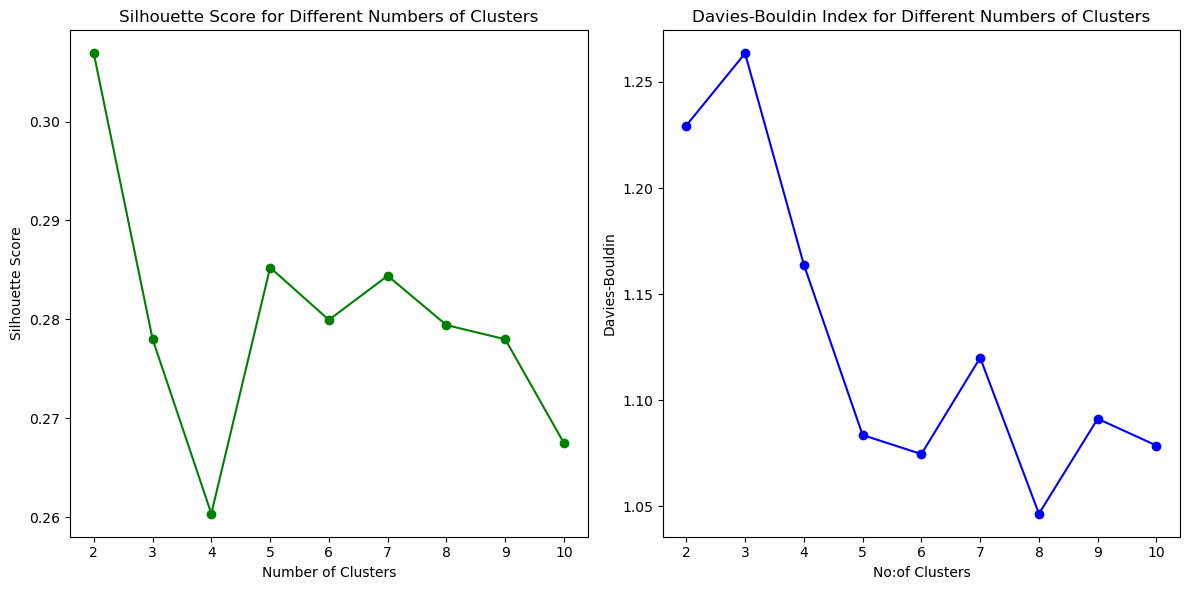

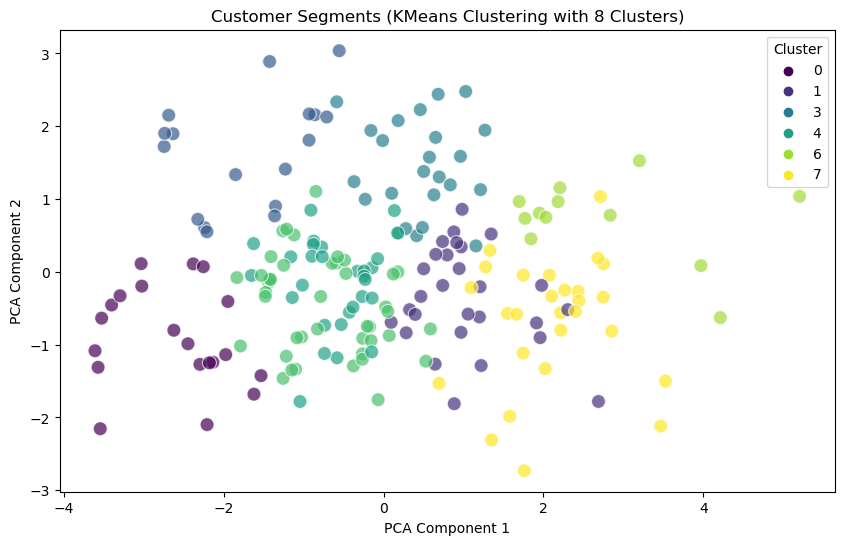

Number of clusters: 8
Davies-Bouldin Index: 1.0466
Silhouette Score: 0.2794


In [7]:
# Clustering with KMeans

# Set the range of clusters (between 2 and 10 clusters)
cluster_range = range(2, 11)
db_indices = []
silhouette_scores = []

# Store the best clustering model
best_kmeans = None
best_db_index = float('inf')

# Iterate through the cluster range and compute the clustering metrics
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=40)
    kmeans.fit(customer_data[numeric_features])
    
    # Calculate the Davies-Bouldin Index (DB Index) and Silhouette Score
    db_index = davies_bouldin_score(customer_data[numeric_features], kmeans.labels_)
    silhouette_avg = silhouette_score(customer_data[numeric_features], kmeans.labels_)
    
    db_indices.append(db_index)
    silhouette_scores.append(silhouette_avg)
    
    # Keep track of the best clustering model based on DB Index
    if db_index < best_db_index:
        best_db_index = db_index
        best_kmeans = kmeans

# Plot the DB Index and Silhouette Score for different cluster numbers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='g')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')


plt.subplot(1, 2, 2)
plt.plot(cluster_range, db_indices, marker='o', linestyle='-', color='b')
plt.title('Davies-Bouldin Index for Different Numbers of Clusters')
plt.xlabel('No:of Clusters')
plt.ylabel('Davies-Bouldin')

plt.tight_layout()
plt.show()

# Visualize the best clustering model using PCA for dimensionality reduction
best_labels = best_kmeans.labels_

# Perform PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(customer_data[numeric_features])

# Plot the PCA components with cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=best_labels, palette='viridis', s=100, alpha=0.7)
plt.title(f'Customer Segments (KMeans Clustering with {best_kmeans.n_clusters} Clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()

# Add the cluster labels to the customer data
customer_data['Cluster'] = best_labels

# Summary of the clustering results
num_clusters = best_kmeans.n_clusters
db_index = best_db_index
silhouette_avg = silhouette_score(customer_data[numeric_features], best_labels)

print(f"Number of clusters: {num_clusters}")
print(f"Davies-Bouldin Index: {db_index:.4f}")
print(f"Silhouette Score: {silhouette_avg:.4f}")